In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import s , ExpectileGAM

In [3]:
np.random.seed(0)

In [6]:
n=100
price = np.sort(np.random.exponential(scale=100,size=n))
quantity = 1000-5 * price - np.random.normal(loc=0,scale=50,size=n)
quantity = quantity.clip(min=0)

In [7]:
n_outliers = 10
outlier_prices = np.random.uniform(5,50,n_outliers)
outlier_quantity = 1100 - np.random.normal(loc=0,scale=50,
size = n_outliers)
price = np.concatenate([price,outlier_prices])
quantity = np.concatenate([quantity,outlier_quantity])

In [8]:
n_outliers = 10
outlier_prices = np.random.uniform(51,100,n_outliers)
outlier_quantity = 900 - np.random.normal(loc=0,scale=50,
size = n_outliers)
price = np.concatenate([price,outlier_prices])
quantity = np.concatenate([quantity,outlier_quantity])

In [9]:
df = pd.DataFrame({
    'Price':price,
    "Quantity":quantity
})

In [10]:
df

,Price,Quantity
0,0.470653,1061.170983
1,1.896857,942.045879
2,2.031245,1048.499943
3,3.997630,882.830789
4,6.211530,989.623301
...,...,...
115,60.302548,924.665994
116,76.054630,927.143074
117,61.991534,879.197498
118,55.794380,957.809122


In [11]:
X = df['Price']
Y = df['Quantity']

In [14]:
quantiles = [0.025,0.5,0.975]
gam_results = {}

for q in quantiles:
    gam = ExpectileGAM(s(0),expectile=q)
    gam.fit(X,Y)
    gam_results[q] = gam

In [15]:
gam_results

{0.025: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.025, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

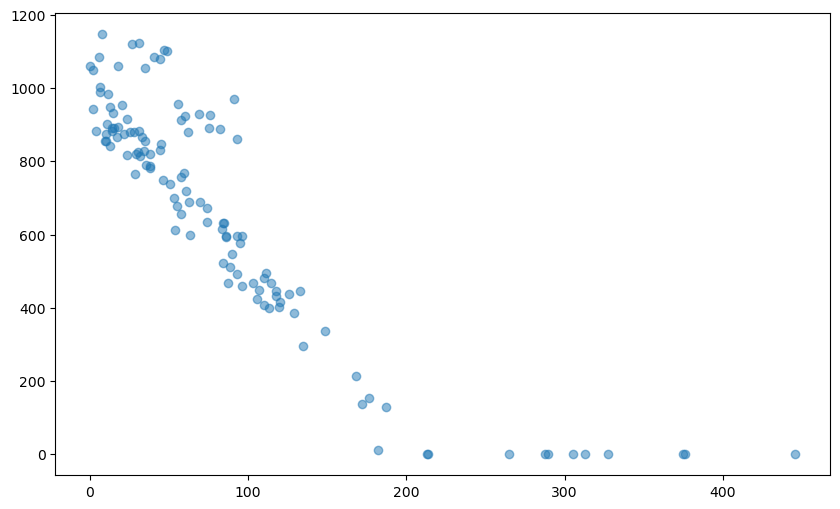

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df['Price'],df['Quantity'],alpha=0.5,label="Data Points")

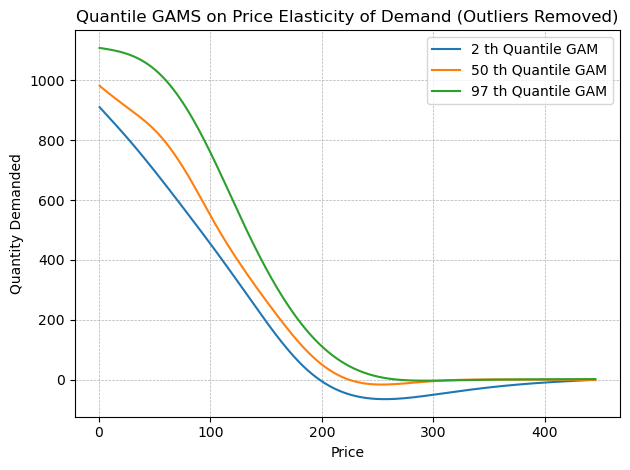

In [18]:
XX = np.linspace(df['Price'].min(),df['Price'].max(),1000).reshape(-1,1)
for q , gam in gam_results.items():
    plt.plot(XX, gam.predict(XX),label=f'{int(q*100)} th Quantile GAM')

plt.xlabel("Price")
plt.ylabel("Quantity Demanded")
plt.title('Quantile GAMS on Price Elasticity of Demand (Outliers Removed)')
plt.legend()
plt.grid(True , which='both',linestyle="--",linewidth=0.5)
plt.tight_layout()
plt.show()

In [19]:
# Save the DataFrame to a CSV file
df.to_csv('custom_dataset.csv', index=False)